In [0]:
# install mask_rcnn library or it's better to upload it, with the custom files edited manually with adjustments for the fashion dataset.
#!git clone https://github.com/matterport/Mask_RCNN.git


!unzip '/content/drive/My Drive/machinelearningdataset/Mask_RCNN.zip'

# in the requirements folder: 
# scipy==1.2.2
# tensorflow>=1.3.0,<2.0
# keras>=2.0.8,<2.3
# import libraries required for the mask_rcnn library
!pip3 install -r 'Mask_RCNN/requirements.txt'
!cd Mask_RCNN ; python setup.py install

# download the Microsoft-coco dataset, in the mask_rcnn folder 
!cd Mask_RCNN; wget 'https://github.com/matterport/Mask_RCNN/releases/download/v2.0/mask_rcnn_coco.h5'

!cd

In [ ]:
%tensorflow_version 1.x


from os import listdir
import json
import PIL.Image as Image
from PIL import Image
import numpy as np
from numpy import zeros
from numpy import asarray
from Mask_RCNN.mrcnn.utils import Dataset
from Mask_RCNN.mrcnn.config import Config
from Mask_RCNN.mrcnn.model import MaskRCNN
from Mask_RCNN.mrcnn.visualize import display_instances
from Mask_RCNN.mrcnn.utils import extract_bboxes

import matplotlib

import matplotlib.pyplot as plt
import skimage.data as data
import skimage.segmentation as seg
import skimage.filters as filters
import skimage.color as color
import PIL.ImageDraw as ImageDraw

In [0]:

#shared deepfashion2 dataset.
#!unzip -P 2019Deepfashion2** '/content/drive/My Drive/DeepFashion2 Dataset/json_for_validation.zip'

#  deepfashion2 dataset saved on google drive
!unzip -P 2019Deepfashion2** '/content/drive/My Drive/machinelearningdataset/json_for_validation.zip'
print('\n','##########################done upzipping files.###########################################')
!unzip -P 2019Deepfashion2** '/content/drive/My Drive/machinelearningdataset/test.zip'
print('\n','##########################done upzipping test files.###########################################')
!unzip -P 2019Deepfashion2** '/content/drive/My Drive/machinelearningdataset/train.zip'
print('\n','##########################done upzipping train files.###########################################')
!unzip -P 2019Deepfashion2** '/content/drive/My Drive/machinelearningdataset/validation.zip'
print('\n','##########################done upzipping validation files.###########################################')


In [0]:
# making sure that everything got installed properly
%tensorflow_version 1.x

!pip3 show mask-rcnn

Name: mask-rcnn
Version: 2.1
Summary: Mask R-CNN for object detection and instance segmentation
Home-page: https://github.com/matterport/Mask_RCNN
Author: Matterport
Author-email: waleed.abdulla@gmail.com
License: MIT
Location: /usr/local/lib/python3.6/dist-packages/mask_rcnn-2.1-py3.6.egg
Requires: 
Required-by: 


In [0]:
# rename the train as train_ to make a smaller train folder 
# make a new smaller folder with a 10000 images from the directory 

%cd /content/
!mkdir train
%cd /content/train/
!mkdir image


%cd /content/train_/image

!ls | head -n 10000 | xargs -i mv {} /content/train/image/


/content
/content/train
/content/train_/image


In [0]:

# make a new smaller folder with a 10000 annotations from the directory 


%cd /content/train/
!mkdir annos


%cd /content/train_/annos/
!ls | head -n 10000 | xargs -i mv {} /content/train/annos/

/content/train
/content/train_/annos


In [0]:
%cd /content/


/content


624 468
[[257, 35, 261, 89, 228, 123, 137, 103, 45, 91, 1, 176, 0, 332, 47, 447, 151, 401, 141, 366, 129, 328, 141, 364, 219, 485, 274, 603, 401, 590, 467, 502, 442, 336, 369, 195, 348, 138, 363, 163, 372, 197, 433, 137, 396, 92, 341, 35, 257, 35], [1, 176, 0, 332, 47, 447, 151, 401, 141, 366, 129, 328, 1, 176], [348, 138, 363, 163, 372, 197, 433, 137, 396, 92, 341, 35, 348, 138]]
(624, 468)
[257, 35, 261, 89, 228, 123, 137, 103, 45, 91, 1, 176, 0, 332, 47, 447, 151, 401, 141, 366, 129, 328, 141, 364, 219, 485, 274, 603, 401, 590, 467, 502, 442, 336, 369, 195, 348, 138, 363, 163, 372, 197, 433, 137, 396, 92, 341, 35, 257, 35, 1, 176, 0, 332, 47, 447, 151, 401, 141, 366, 129, 328, 1, 176, 348, 138, 363, 163, 372, 197, 433, 137, 396, 92, 341, 35, 348, 138]


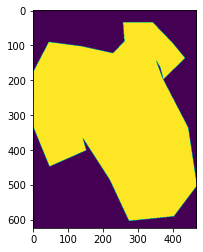

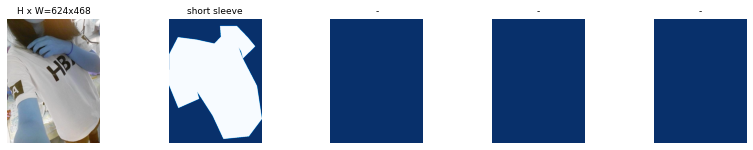

In [0]:
######
#####
#segmentation load_mask() function. reading the annotations from the labelled data set. 
######
#####

%matplotlib inline

import matplotlib

import numpy as np
import matplotlib.pyplot as plt
import skimage.data as data
import skimage.segmentation as seg
import skimage.filters as filters
import skimage.draw 
import skimage.color as color
import json
import PIL.ImageDraw as ImageDraw
import PIL.Image as Image

from Mask_RCNN.mrcnn.visualize import display_instances
from Mask_RCNN.mrcnn import visualize
from Mask_RCNN.mrcnn.visualize import display_images


open_file= '/content/train/annos/000001.json'
with open(open_file) as f:
  data = f.read()
  jsondata = json.loads(data)

segmentation_iterate=jsondata['item1']['segmentation']
try:
  segmentation_iterate_2=jsondata['item2']['segmentation']
except Exception:
  print('nope')
  pass


polygon_points=[]

image = Image.open('/content/train/image/000001.jpg')
h, w = image.size
print(w,h)

print(segmentation_iterate)

img = Image.new('L', (h, w), 0)
for k in range(len(segmentation_iterate)):
  ImageDraw.Draw(img).polygon(segmentation_iterate[k], fill=400)
  for index, values in enumerate(segmentation_iterate[k]):
    polygon_points.append(values)
mask = np.array(img)

print(mask.shape)
print(polygon_points)
plt.imshow(mask)

plt.show()

import cv2
image = cv2.imread('/content/train/image/000001.jpg')
image=np.array(image)
mask=np.expand_dims(mask,axis=2)
class_ids = [0]
class_names=['short sleeve']

#use the mask rcnn built-in function to display and compare image with its mask
visualize.display_top_masks(image, mask, class_ids, class_names)


In [0]:
###########################
###########################

####using segnmentations###

###########################
###########################

# classify images within the dataset
class Short_sleeve_shirt_Dataset(Dataset):
  
  def load_dataset(self, dataset_dir, is_train=True):
    # 13 classes within the dataset
    self.add_class("fashion", 1, "short sleeve top")
    self.add_class("fashion", 2, "long sleeve top")
    self.add_class("fashion", 3, "short sleeve outwear")
    self.add_class("fashion", 4, "long sleeve outwear")
    self.add_class("fashion", 5, "vest")
    self.add_class("fashion", 6, "sling")
    self.add_class("fashion", 7, "shorts")
    self.add_class("fashion", 8, "trousers")
    self.add_class("fashion", 9, "skirt")
    self.add_class("fashion", 10, "short sleeve dress")
    self.add_class("fashion", 11, "long sleeve dress")
    self.add_class("fashion", 12, "vest dress")
    self.add_class("fashion", 13, "sling dress")
    
    #image and annotation paths
    dataset_dir= '/content/train'
    images_dir = dataset_dir + '/image/'
    annotations_dir = dataset_dir + '/annos/'

    #making sure that images and annotations are sorted and match each other
    ordered = listdir(images_dir)
    ordered.sort()


    image_id=[]
    for filename in ordered:
          image_id_text=filename[:-4]
          image_id.append(int(filename[:-4]))
          img = Image.open(images_dir+filename)

          open_file= annotations_dir+ (image_id_text)+ '.json'
          with open(open_file) as f:
            data = f.read()
            jsondata = json.loads(data)
          
          # split dataset into train and test sets
          if is_train and int(image_id_text) >= 8000:
            continue
          if not is_train and int(image_id_text) < 8000:
            continue
          img_path = images_dir + filename
          ann_path = open_file 
          

          self.add_image('fashion', image_id=image_id, path=img_path, annotation=ann_path)
          
         

  def load_mask(self, image_id_in_function):

    dataset_dir= '/content/train'
    images_dir = dataset_dir + '/image/'
    annotations_dir = dataset_dir + '/annos/'

    ordered = listdir(images_dir)
    ordered.sort()

    image_id_sss=[]
    image_id=[]
    width=[]
    height=[]
    bounding_box=[]
    category_id=[]
    category_name=[]
    segmentation=[]
    # grab annotations
    for filename in ordered:
          image_id_text=filename[:-4]
          image_id.append(int(filename[:-4]))
          img = Image.open(images_dir+filename)
          w, h = img.size
  
          open_file= annotations_dir+ (image_id_text)+ '.json'
          with open(open_file) as f:
            data = f.read()
            jsondata = json.loads(data)

          category_name_iterate=jsondata['item1']['category_name']
          bounding_box_iterate=jsondata['item1']['bounding_box']
          category_id_iterate=jsondata['item1']['category_id']
          segmentation_iterate=jsondata['item1']['segmentation']
          bounding_box.append(bounding_box_iterate)
          category_id.append(category_id_iterate)
          category_name.append(category_name_iterate)
          segmentation.append(segmentation_iterate)
          image_id_sss.append(int(image_id_text))
          width.append(w)
          height.append(h)

    
    bounding_box=np.array(bounding_box)
    category_id=np.array(category_id)
    category_name=np.array(category_name)
    segmentation=np.array(segmentation)
    width=np.array(width)
    height=np.array(height)

    height_at_image_id_in_function= height[image_id_in_function]
    width_at_image_id_in_function= width[image_id_in_function]
    bounding_box_at_image_id_in_function= bounding_box[image_id_in_function]
    segmentation_at_image_id_in_function=segmentation[image_id_in_function]
    category_name_at_image_id_in_function=category_name[image_id_in_function]

    # generate a mask for image 
    polygon_points=[]
    img = Image.new('L', (width_at_image_id_in_function, height_at_image_id_in_function), 0)
    for k in range(len(segmentation_at_image_id_in_function)):
      ImageDraw.Draw(img).polygon(segmentation_at_image_id_in_function[k], fill=400)
      for index, values in enumerate(segmentation_at_image_id_in_function[k]):
        polygon_points.append(values)
    masks = np.array(img)
    masks=np.expand_dims(masks,axis=2)
    class_ids = []
    class_ids.append(self.class_names.index(category_name_at_image_id_in_function))
    return masks, asarray(class_ids, dtype='int32')

In [0]:
# define a configuration for the model
class Short_sleeve_shirt_Config(Config):
    # define the name of the configuration
    NAME = "short_sleeve_shirt_cfg"
    # BACKBONE = "resnet50"
    
    # TRAIN_ROIS_PER_IMAGE = 200 # default is unchanged

    # number of classes (background + 13 classes)
    NUM_CLASSES = 1 + 13
    # Train on 1 GPU and 8 images per GPU. We can put multiple images on each
    # GPU because the images are small. Batch size is 8 (GPUs * images/GPU).
    
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

    # Use small images for faster training. Set the limits of the small side
    # the large side, and that determines the image shape.
    IMAGE_MIN_DIM = 128
    IMAGE_MAX_DIM = 128

    # Use smaller anchors because our image and objects are small
    RPN_ANCHOR_SCALES = (8, 16, 32, 64, 128)  # anchor side in pixels

    # Reduce training ROIs per image because the images are small and have
    # few objects. Aim to allow ROI sampling to pick 33% positive ROIs.
    TRAIN_ROIS_PER_IMAGE = 32

    # Use a small epoch since the data is simple
    STEPS_PER_EPOCH = 100

    # use small validation steps since the epoch is small
    VALIDATION_STEPS = 5


In [0]:
def get_imagenet_weights(self):
    """Downloads ImageNet trained weights from Keras.
    Returns path to weights file.
    """
    from keras.utils.data_utils import get_file
    TF_WEIGHTS_PATH_NO_TOP = 'https://github.com/fchollet/deep-learning-models/'\
                              'releases/download/v0.2/'\
                              'resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5'
    weights_path = get_file('resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5',
                            TF_WEIGHTS_PATH_NO_TOP,
                            cache_subdir='models',
                            md5_hash='a268eb855778b3df3c7506639542a6af')
    return weights_path

In [0]:
# prepare train set
train_set = Short_sleeve_shirt_Dataset()
train_set.load_dataset('fashion', is_train=True)
train_set.prepare()
print('Train: %d' % len(train_set.image_ids))

# prepare test/val set
test_set = Short_sleeve_shirt_Dataset()
test_set.load_dataset('fashion', is_train=False)
test_set.prepare()
print('Test: %d' % len(test_set.image_ids))

# prepare config
config = Short_sleeve_shirt_Config()
config.display()
# define the model
model = MaskRCNN(mode='training', model_dir='./', config=config)

# load weights (mscoco) and exclude the output layers. 
init_with = "coco"
if init_with == "imagenet":
    model.load_weights(model.get_imagenet_weights(), by_name=True)
    
elif init_with == "coco":
    
    # Load the last model trained and continue training
    ######## model.load_weights(model.find_last(), by_name=True)
    model.load_weights('/content/Mask_RCNN/mask_rcnn_coco.h5', by_name=True, exclude=["mrcnn_class_logits", "mrcnn_bbox_fc",  "mrcnn_bbox", "mrcnn_mask"])

# train weights
model_training_results = model.train(train_set, test_set, learning_rate=config.LEARNING_RATE / 100, epochs=10, layers='all')


model.keras_model.summary()

Train: 7999
Test: 2001

Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.7
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  128
IMAGE_META_SIZE                26
IMAGE_MIN_DIM                  128
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [128 128   3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14


/tensorflow-1.15.2/python3.6/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
/tensorflow-1.15.2/python3.6/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
/tensorflow-1.15.2/python3.6/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
/usr/local/lib/python3.6/dist-packages/keras/engine/training_generator.py:49: UserWarning: Using a generator with `use_multiprocessing=True` and multiple 

Epoch 1/10
100/100 [==============================] - 340s 3s/step - loss: 7.8273 - rpn_class_loss: 0.0894 - rpn_bbox_loss: 1.4547 - mrcnn_class_loss: 4.1424 - mrcnn_bbox_loss: 1.2097 - mrcnn_mask_loss: 0.9311 - val_loss: 6.0309 - val_rpn_class_loss: 0.0895 - val_rpn_bbox_loss: 1.3361 - val_mrcnn_class_loss: 2.4140 - val_mrcnn_bbox_loss: 1.2638 - val_mrcnn_mask_loss: 0.9274


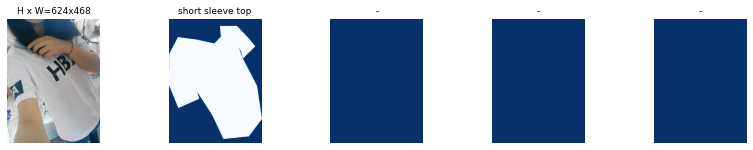

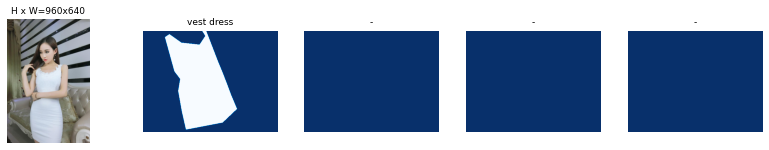

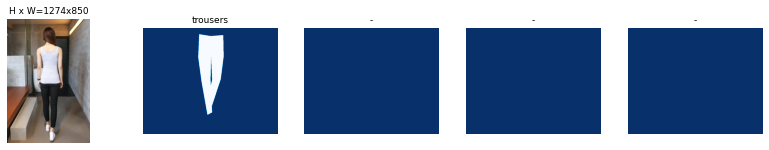

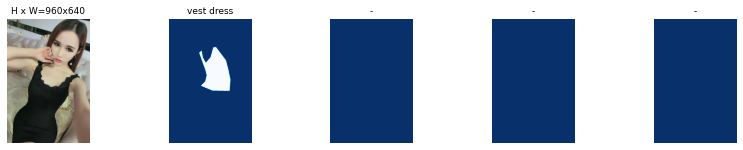

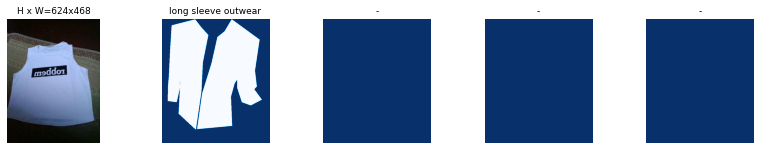

In [0]:
# visulaizing masks

from Mask_RCNN.mrcnn.visualize import display_instances
from Mask_RCNN.mrcnn import visualize
from Mask_RCNN.mrcnn.visualize import display_images


# # train set
train_set = Short_sleeve_shirt_Dataset()
train_set.load_dataset('fashion', is_train=True)
train_set.prepare()

image_id = 0

# # load the image
image = train_set.load_image(image_id)
# # load the masks and the class ids
mask, class_ids = train_set.load_mask(image_id)
visualize.display_top_masks(image, mask, class_ids, train_set.class_names)
mask.shape


# Load and display 4 random samples
image_ids = np.random.choice(train_set.image_ids, 4)
for image_id in image_ids:
    image = train_set.load_image(image_id)
    mask, class_ids = train_set.load_mask(image_id)
    visualize.display_top_masks(image, mask, class_ids, train_set.class_names)


image_id  3263 


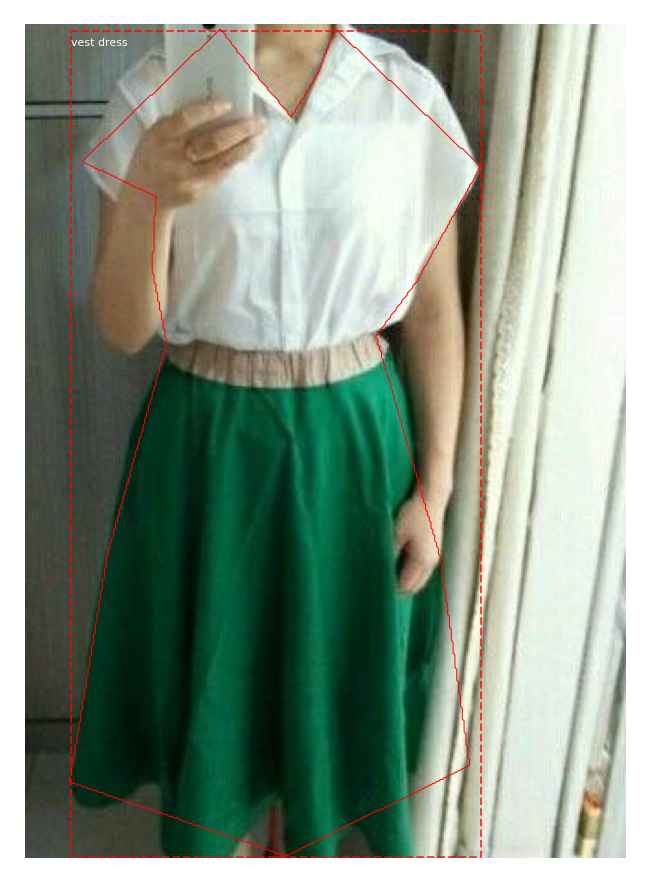

image_id:  49 
Original shape:  (833, 468, 3)


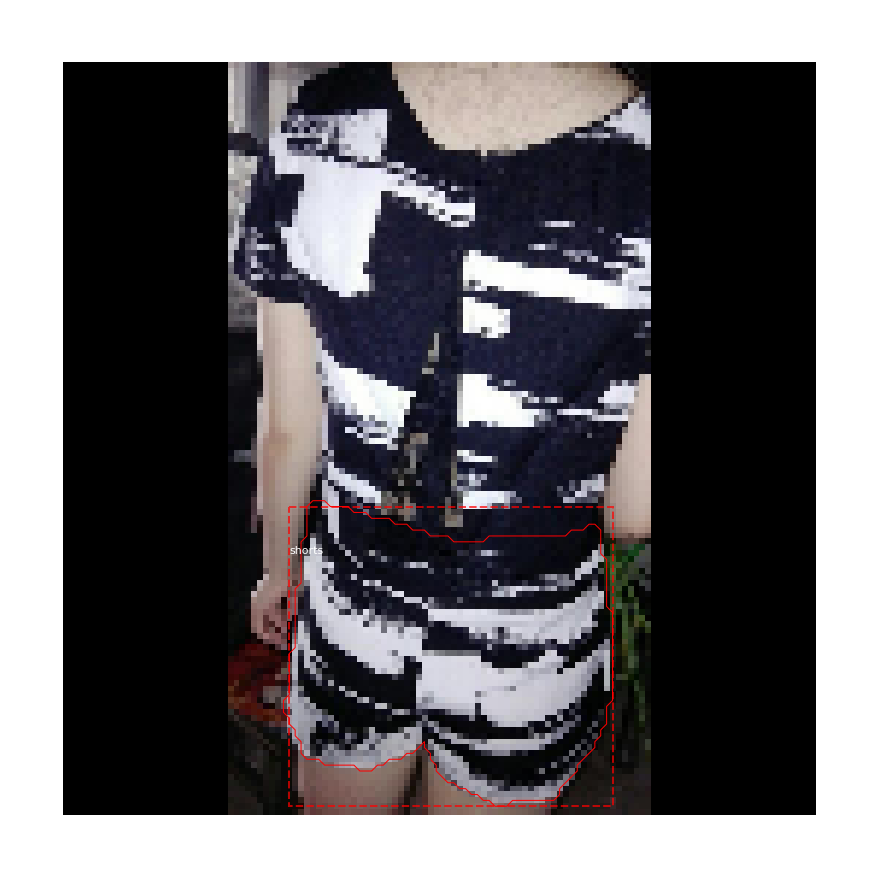

In [0]:
################
###############

##### visualize some training results####

################
###############

from os import listdir
from numpy import zeros
from numpy import asarray
from numpy import expand_dims
from matplotlib import pyplot
from matplotlib.patches import Rectangle
from Mask_RCNN.mrcnn.config import Config
from Mask_RCNN.mrcnn.model import MaskRCNN
from Mask_RCNN.mrcnn.model import mold_image
from Mask_RCNN.mrcnn.utils import Dataset
from Mask_RCNN.mrcnn import utils
import random


# Load random image and mask.
image_id = random.choice(train_set.image_ids)

image = train_set.load_image(image_id)
mask, class_ids = train_set.load_mask(image_id)
# Compute Bounding box
bbox = utils.extract_bboxes(mask)

# Display image and additional stats
print("image_id ", image_id, train_set.image_reference(image_id))
# Display image and instances
visualize.display_instances(image, bbox, mask, class_ids, train_set.class_names)




# Load random image and mask.
image_id = np.random.choice(train_set.image_ids, 1)[0]
image = train_set.load_image(image_id)
mask, class_ids = train_set.load_mask(image_id)
original_shape = image.shape
# Resize
image, window, scale, padding, _ = utils.resize_image(
    image, 
    min_dim=config.IMAGE_MIN_DIM, 
    max_dim=config.IMAGE_MAX_DIM,
    mode=config.IMAGE_RESIZE_MODE)
mask = utils.resize_mask(mask, scale, padding)
# Compute Bounding box
bbox = utils.extract_bboxes(mask)

# Display image and additional stats
print("image_id: ", image_id, train_set.image_reference(image_id))
print("Original shape: ", original_shape)

# Display image and instances
visualize.display_instances(image, bbox, mask, class_ids, train_set.class_names)


In [0]:
############
###########
### inference

# define a configuration for the model
class PredictionConfig(Config):
    # define the name of the configuration
    NAME = "short_sleeve_shirt_cfg"
    BACKBONE = "resnet50"
    
    # Train on 1 GPU and 8 images per GPU. We can put multiple images on each
    # GPU because the images are small. Batch size is 8 (GPUs * images/GPU).
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

    # Number of classes (including background)
    NUM_CLASSES = 1 + 13  # background + 1 class

    # Use small images for faster training. Set the limits of the small side
    # the large side, and that determines the image shape.
    IMAGE_MIN_DIM = 128
    IMAGE_MAX_DIM = 128

    # Use smaller anchors because our image and objects are small
    RPN_ANCHOR_SCALES = (8, 16, 32, 64, 128)  # anchor side in pixels

    # Reduce training ROIs per image because the images are small and have
    # few objects. Aim to allow ROI sampling to pick 33% positive ROIs.
    TRAIN_ROIS_PER_IMAGE = 32

    # Use a small epoch since the data is simple
    STEPS_PER_EPOCH = 100

    # use small validation steps since the epoch is small
    VALIDATION_STEPS = 5

    # Minimum probability value to accept a detected instance
    # ROIs below this threshold are skipped
    DETECTION_MIN_CONFIDENCE = 0.6

    # Non-maximum suppression threshold for detection
    DETECTION_NMS_THRESHOLD = 0.0




# create config
cfg = PredictionConfig()
# define the model
model = MaskRCNN(mode='inference', model_dir='./', config=cfg)
# load model weights. Where it was trained in the earlier step. 
# the latest mask has the least error, so load that one
model_path = '/content/drive/My Drive/mask_rcnn_fashion.h5'

# in case of an error, use below
# model.load_weights(model_path, by_name=True, exclude=[ "mrcnn_class_logits", "mrcnn_bbox_fc", "mrcnn_bbox", "mrcnn_mask"])
model.load_weights(model_path, by_name=True, exclude=[ "mrcnn_class_logits", "mrcnn_bbox_fc", "mrcnn_bbox", "mrcnn_mask"])

model.keras_model.summary()

Model: "mask_rcnn"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_image (InputLayer)        (None, None, None, 3 0                                            
__________________________________________________________________________________________________
zero_padding2d_19 (ZeroPadding2 (None, None, None, 3 0           input_image[0][0]                
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, None, None, 6 9472        zero_padding2d_19[0][0]          
__________________________________________________________________________________________________
bn_conv1 (BatchNorm)            (None, None, None, 6 256         conv1[0][0]                      
__________________________________________________________________________________________

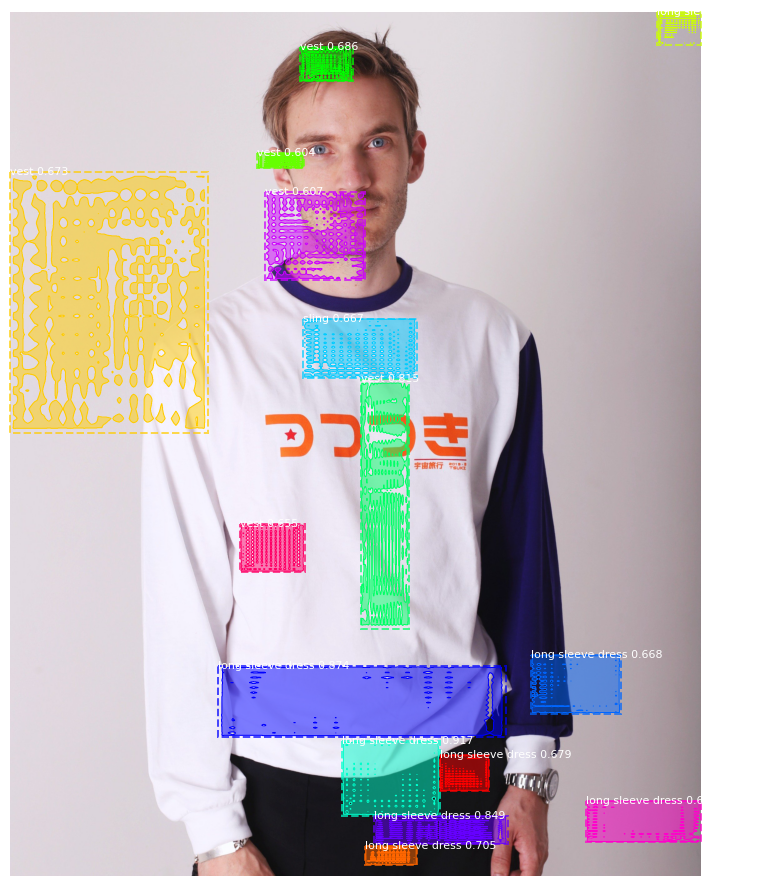

[11 11 11  5 11  5 11 11  5 11  6  5  2  5  5]


In [0]:
# donwload test images
# !wget 'https://cdn.shopify.com/s/files/1/2321/0267/products/felix-longsleeve.jpg'
# !wget 'https://cdn.shopify.com/s/files/1/0210/9734/products/ahzekLR.jpg'
# !wget 'https://mms-images.out.customink.com/mms/images/catalog/colors/4600/views/front.jpg'


test_image='felix-longsleeve.jpg'
# test_image='ahzekLR.jpg'
# test_image='front.jpg'

test_image=plt.imread(test_image)

results = model.detect([test_image], verbose=0)
r = results[0]


class_names= ['BG','short sleeve top',
              'long sleeve top',
              'short sleeve outwear',
              'long sleeve outwear',
              'vest',
              'sling',
              'shorts',
              'trousers',
              'skirt',
              'short sleeve dress',
              'long sleeve dress',
              'vest dress',
              'sling dress']

visualize.display_instances(test_image, 
                                    r['rois'], 
                                    r['masks'], 
                                    r['class_ids'], 
                                    class_names, 
                                    r['scores'])

print(r['class_ids'])

In [0]:
##########
#########
## generate a Mini Mask to see how it get embedded

##########
#########


from Mask_RCNN.mrcnn import model as modellib, utils

image_id = np.random.choice(train_set.image_ids, 1)[0]
image, image_meta, class_ids, bbox, mask = modellib.load_image_gt(
    train_set, config, image_id, use_mini_mask=False)

display_images([image]+[mask[:,:,i] for i in range(min(mask.shape[-1], 7))])

visualize.display_instances(image, bbox, mask, class_ids, train_set.class_names)
